In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [38]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 18})
plt.rcParams.update({"axes.labelsize": 15})

In [39]:
def spikelet_fun(strength,num_neurons):
    return (strength*  -7.26668869e+01 - 1.32272004e-03) *((num_neurons)*-1.84361670e-01)

In [40]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()

#time parameters
t_final = 1500
dt = 0.01



#Other constant parameters
num_neurons = 5
#Variation for the initial conditions
Isyn = 0.0
tau = 0.65
V0 = -65 * np.ones(num_neurons)
y0 = -65 * np.ones(num_neurons)
w0 = 0 * np.ones(num_neurons)
u0 = 0 * np.ones(num_neurons) 
n0 = 0 * np.ones(num_neurons)
m0 = 0 * np.ones(num_neurons)
h0 = 0 * np.ones(num_neurons)
order = 2


#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),num_neurons))
I_IF = np.zeros((int(t_final/dt),num_neurons))


I_HH[:,0] = 2.5 
I_IF[:,0] = 2.5 

HH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
HH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IF_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IF_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

In [41]:
#Creating the Electrical and Chemical connectivity matrices, in this case for 10 neurons
E_matrix,seed = project.utils.create_matrix('electrical',num_neurons,connection_fraction_e=1)
C_matrix, seed = project.utils.create_matrix('chemical',num_neurons,connection_fraction_c=1)

In [42]:
dataHH_adjust, completeHH_adjust, matrixHH_adjust, synaptic_HH = project.models.HH_Neuron_Network_tests(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,Isyn,0.0012,tau,E_matrix,C_matrix,HH_gap_junction,HH_synaptic_current)
dataIF_adjust, completeIF_adjust, matrixIF_adjust, synaptic_IF = project.models.LIF_Neuron_Network_tests(dt, t_final,order,y0,*params_LIF,I_IF,Isyn,0.0012,tau,spikelet_fun(0.0012,5),E_matrix,C_matrix, IF_gap_junction, IF_synaptic_current)

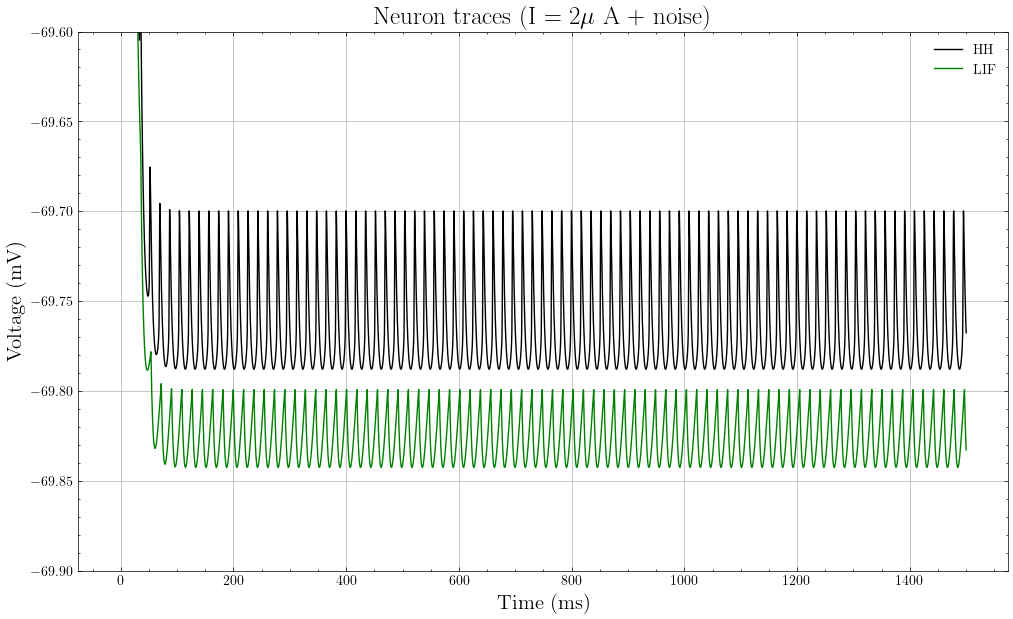

In [43]:
time = np.linspace(0,t_final,int(t_final/dt))
plt.plot(time,dataHH_adjust[:,1], color = 'black', label = 'HH')
plt.plot(time,dataIF_adjust[:,1], color = 'green', label = 'LIF')
plt.title(r'Neuron traces (I = 2$\mu$ A + noise)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.ylim(-69.9,-69.6)
plt.legend()

In [20]:
num_gap = 10
diff_HH = np.zeros(10)
diff_IF = np.zeros(10)

#Other constant parameters
num_neurons = 5
#Variation for the initial conditions
Isyn = 0.0
tau = 0.65
V0 = -65 * np.ones(num_neurons)
y0 = -65 * np.ones(num_neurons)
w0 = 0 * np.ones(num_neurons)
u0 = 0 * np.ones(num_neurons) 
n0 = 0 * np.ones(num_neurons)
m0 = 0 * np.ones(num_neurons)
h0 = 0 * np.ones(num_neurons)
order = 2


#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),num_neurons))
I_IF = np.zeros((int(t_final/dt),num_neurons))


I_HH[:,0] = 3.0
I_IF[:,0] = 3.0 

HH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
HH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IF_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IF_synaptic_current = np.zeros((int(t_final/dt),num_neurons))
k = 0.0005
k_plus = 0.00025
k = np.linspace(k,num_gap*k_plus + k,num_gap)

for i in range(0,num_gap):
    dataHH_adjust, completeHH_adjust, matrixHH_adjust, synaptic_HH = project.models.HH_Neuron_Network_tests(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,Isyn,k[i],tau,E_matrix,C_matrix,HH_gap_junction,HH_synaptic_current)
    dataIF_adjust, completeIF_adjust, matrixIF_adjust, synaptic_IF = project.models.LIF_Neuron_Network_tests(dt, t_final,order,y0,*params_LIF,I_IF,Isyn,k[i],tau,spikelet_fun(0.0012,5),E_matrix,C_matrix, IF_gap_junction, IF_synaptic_current)

    diff_HH[i]= np.max(dataHH_adjust[10000:,1]) - np.min(dataHH_adjust[10000:,1])
    diff_IF[i] = np.max(dataIF_adjust[10000:,1]) - np.min(dataIF_adjust[10000:,1])

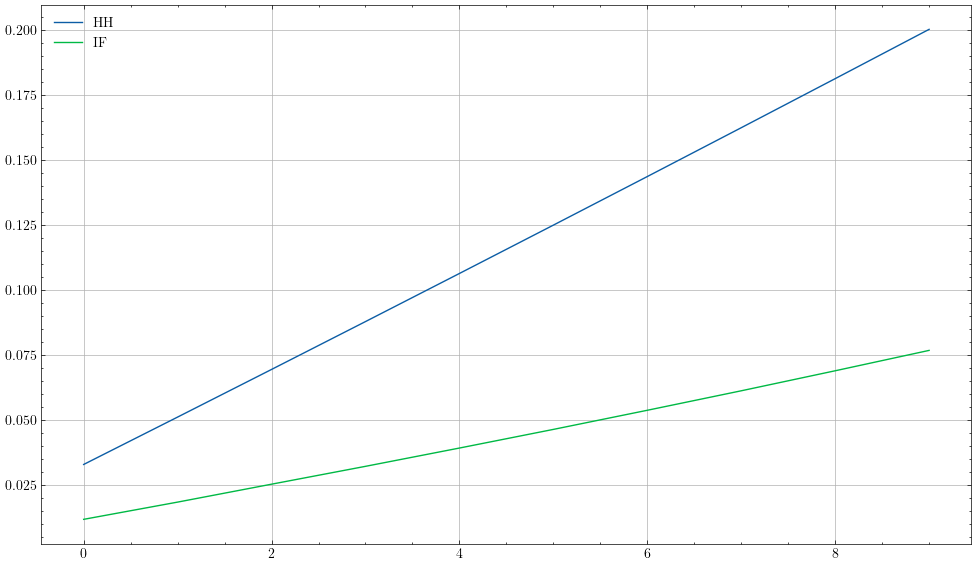

In [21]:

plt.plot(diff_HH, label = 'HH')
plt.plot(diff_IF,label = 'IF')

plt.legend()

In [30]:
import scipy
def fit_fun (x,a,b,n):
    return (x*a + b) * 5* n
popt, pcov = scipy.optimize.curve_fit(fit_fun,k,diff_HH)

In [33]:
def fit_fun_2 (x,a,n):
    return (np.exp(x) * a *x)*5*n
popt_2, pcov_2 = scipy.optimize.curve_fit(fit_fun_2,k,diff_HH)

In [36]:
popt

array([-7.26668869e+01,  1.32272004e-03, -1.84361670e-01])

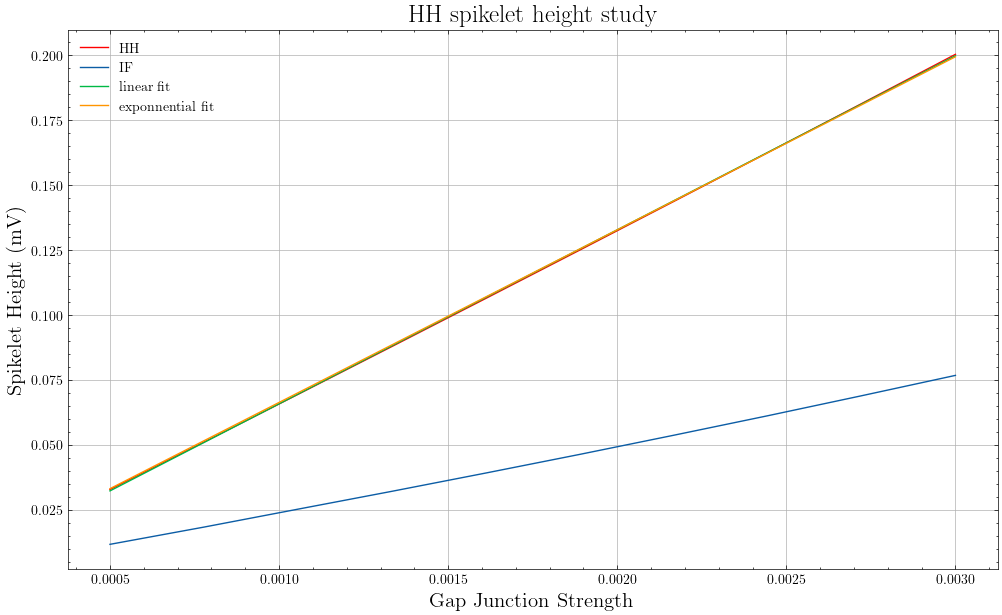

In [35]:
plt.plot(k,diff_HH, color = 'red', label = 'HH')
plt.plot(k,diff_IF,label = 'IF')
plt.plot(k,fit_fun(k,popt[0],popt[1],popt[2]), label = 'linear fit')
plt.plot(k,fit_fun_2(k,popt_2[0],popt_2[1]),label = 'exponnential fit')
plt.title('HH spikelet height study')
plt.xlabel('Gap Junction Strength')
plt.ylabel(r'Spikelet Height (mV)')
plt.legend()

In [45]:
num_gap = 10
num_neurons = 10
diff_HH = np.zeros((num_neurons,num_gap))
diff_IF = np.zeros((num_neurons,num_gap))

#Other constant parameters


k = 0.0005
ini_num = 2
num_plus = 1
k_plus = 0.00025
k = np.linspace(k,num_gap*k_plus + k,num_gap)
num = np.linspace(ini_num,num_neurons*num_plus + ini_num,num_neurons,dtype=int)

for i in range(0,num_neurons):
    
    E_matrix,seed = project.utils.create_matrix('electrical',num[i],connection_fraction_e=1)
    C_matrix, seed = project.utils.create_matrix('chemical',num[i],connection_fraction_c=1)
    #Variation for the initial conditions
    Isyn = 0.0
    tau = 0.65
    V0 = -65 * np.ones(num[i])
    y0 = -65 * np.ones(num[i])
    w0 = 0 * np.ones(num[i])
    u0 = 0 * np.ones(num[i]) 
    n0 = 0 * np.ones(num[i])
    m0 = 0 * np.ones(num[i])
    h0 = 0 * np.ones(num[i])
    order = 2


    #fixing random seed
    np.random.seed(1234)

    #generating the intensities
    I_HH = np.zeros((int(t_final/dt),num[i]))


    I_HH[:,0] = 3.0

    HH_gap_junction = np.zeros((int(t_final/dt),num[i]))
    HH_synaptic_current = np.zeros((int(t_final/dt),num[i]))
    for j in range(0,num_gap):
        dataHH_adjust, completeHH_adjust, matrixHH_adjust, synaptic_HH = project.models.HH_Neuron_Network_tests(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,Isyn,k[j],tau,E_matrix,C_matrix,HH_gap_junction,HH_synaptic_current)

        diff_HH[i,j]= np.max(dataHH_adjust[10000:,1]) - np.min(dataHH_adjust[10000:,1])